In [6]:
import googleapiclient.discovery
import spacy
from spacy_langdetect import LanguageDetector
import pandas as pd
from spacy.language import Language
import re
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# import emoji

import environ

from utils.def_api_google import obtenir_infos_video_et_commentaires
from utils.def_utils import comment_analysis, word_cloud, bigramme, all_comments


c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hervo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Device set to use cpu


In [5]:
env = environ.Env()
environ.Env().read_env('.env')

API_KEY = env('API_KEY')

In [31]:
# Squeezie
squeezie_videos = [
    "woiFO4o3CXI", "7_60w7T1Oak", "coWT9YsAAC0", "L9HzH8v0Now",
    "N-TCJquxeFk", "qSUE11N1GPM", "8jluurK-E6U", "LyDJTp4nS3w",
    "LBraVzyYDKg", "tCIIrPEF8Hk"
]

# Vilebrequin
vilebrequin_videos = [
    "dKYvoi2EBPc", "t775Ro5-_co", "D6uuBMGwwF0", "O_1ktnqdWHc",
    "qEuZ6u5ISgQ", "hBV07QvRuoA", "KWmvv479bIo", "GEDZnZpqYBo",
    "U0F2WK0J40g", "w0CdJP4vMH0"
]

# Amixem
amixem_videos = [
    "bbetYpYH-gI", "iU34s9rbPoE", "x2WASA8bb-I", "JbiBkKy4NFs",
    "GFnzjrGh3Yc", "XhbECIm1Wa4", "rKRAkNc4OKw", "7a0DayJnGMc",
    "V9dJEWTjxlM", "dcTAk9ASfIk"
]

# Joueur du Grenier
joueur_du_grenier_videos = [
    "PwWbpWitqrY", "kVBqoT6jwkc", "VWWSClpfGyM", "CHAJ5KVanOQ",
    "XupXzZ8Ste0", "ATinnavGVS8", "7Go9qIxotkk", "QBBLxrvOmqw",
    "naleZElAgW8", "ZVYaGfs80b0"
]

# Cyrus North
cyrus_north_videos = [
    "G2m5Oo1wAW0", "tetcl3YSXBA", "aHxxlIRQnU0", "T6ibwP4CQMg",
    "vCBLs8dWCO0", "cXkXPFAr8gE", "9tXRZuFuq7Y", "O1xOQ4yJUjQ",
    "xQThTwAgdYM", "0hUWdvTl35w"
]

# Djilsi
djilsi_videos = [
    "bJI2ATANRSQ", "EUIzi0uJDLE", "pbSaFUNheN8", "g0wg7RwbBws", "JpIShIIrrpM"
]

# mcFly et Carlito
mcfly_et_carlito_videos = [
    "bRUn6EcaGY8", "Y1pGooULiDU", "ydKtv2PJP0U", "Eu4RtkzDKzI",
    "yu1ExmSBS8M", "6u-Ex1g7-zU"
]

# Pierre Croce
pierre_croce_videos = [
    "9VSotkFq4IM", "U7Ukyk-dkgI", "7d4CAmaCnoQ", "XysTdbVUwZc",
    "njdzmswnfvM", "c3SHBznbrxc", "8C8P-Qc6h1M", "OkTl9vcZ2uc",
    "-bxCWpw9P60", "sHfR_j_YuN0"
]

# Dr Nozman
dr_nozman_videos = [
    "gQWf6XpOrXI", "51ZmMUrhyvc", "FufL6oGb29o", "v0dI0VBtxL4",
    "tolqKhcU4co", "qKYG73Afrck", "ldhqxATvL9Y", "ztXkey7rIIw",
    "A66mibBBAoo", "gExdT8klY1g"
]

# Fabien Olicard
fabien_olicard_videos = [
    "fCMHWVtgy4I", "alAfjFlnV5o", "nvUW0rNRO4o", "nJESmkkFRF4",
    "JEolX-p_-Io", "lFmbQb-SjPQ", "CTe1rSjlAKs", "rXdQYh0QZKo",
    "1wVZNaIEaS0", "5cY99zkU_-o"
]

# Mathieu Sommet
mathieu_sommet_videos = [
    "TakDopIi-cM", "VCYaK_hfRhU"
]

# Cyprien
cyprien_videos = [
    "KSQEnxZId9Y", "sEirqnPSyro", "zs8h7DceMug", "7agOVafPP9s",
    "CpZBJZYJKFE", "ZdIlTXH9ksY", "LCrrT8fzCJE"
]

# MATH
math_videos = [
    "9n-BPZjj7BQ", "6Np3jfuxhwA", "nTxNyHCkXYU", "5AAUf9-b7XI",
    "CY-FREr9mVM", "2P9zqL4Krm0", "wQ7VFFOdmtc", "uow5jejB7aE",
    "VyxeyI61LTs", "3QEr60qPBYQ"
]

# Poisson Fecond
poisson_fecond_videos = [
    "CK7X4Xuuj_k", "3oeyuMvqCiw", "LllbMz86RaE", "4sq4GS4CzJ4",
    "w4LQ7jF4oYY", "dF1wtYOkjEg", "BdNG7Cigivc", "o-yZmk20uaQ",
    "D74ar08b5Ig", "adGK7xLjqhE"
]


In [ ]:
# On récupère les commentaires des vidéos
for j in [squeezie_videos, vilebrequin_videos, amixem_videos, joueur_du_grenier_videos, cyrus_north_videos, djilsi_videos, mcfly_et_carlito_videos, pierre_croce_videos, dr_nozman_videos, fabien_olicard_videos, mathieu_sommet_videos, cyprien_videos, math_videos, poisson_fecond_videos]:
    for i in j:
        commentaires_1, infos_video_1 = obtenir_infos_video_et_commentaires(i, API_KEY)  
    print(j)


['woiFO4o3CXI', '7_60w7T1Oak', 'coWT9YsAAC0', 'L9HzH8v0Now', 'N-TCJquxeFk', 'qSUE11N1GPM', '8jluurK-E6U', 'LyDJTp4nS3w', 'LBraVzyYDKg', 'tCIIrPEF8Hk']
['dKYvoi2EBPc', 't775Ro5-_co', 'D6uuBMGwwF0', 'O_1ktnqdWHc', 'qEuZ6u5ISgQ', 'hBV07QvRuoA', 'KWmvv479bIo', 'GEDZnZpqYBo', 'U0F2WK0J40g', 'w0CdJP4vMH0']
['bbetYpYH-gI', 'iU34s9rbPoE', 'x2WASA8bb-I', 'JbiBkKy4NFs', 'GFnzjrGh3Yc', 'XhbECIm1Wa4', 'rKRAkNc4OKw', '7a0DayJnGMc', 'V9dJEWTjxlM', 'dcTAk9ASfIk']
['PwWbpWitqrY', 'kVBqoT6jwkc', 'VWWSClpfGyM', 'CHAJ5KVanOQ', 'XupXzZ8Ste0', 'ATinnavGVS8', '7Go9qIxotkk', 'QBBLxrvOmqw', 'naleZElAgW8', 'ZVYaGfs80b0']
['G2m5Oo1wAW0', 'tetcl3YSXBA', 'aHxxlIRQnU0', 'T6ibwP4CQMg', 'vCBLs8dWCO0', 'cXkXPFAr8gE', '9tXRZuFuq7Y', 'O1xOQ4yJUjQ', 'xQThTwAgdYM', '0hUWdvTl35w']
['bJI2ATANRSQ', 'EUIzi0uJDLE', 'pbSaFUNheN8', 'g0wg7RwbBws', 'JpIShIIrrpM']
['bRUn6EcaGY8', 'Y1pGooULiDU', 'ydKtv2PJP0U', 'Eu4RtkzDKzI', 'yu1ExmSBS8M', '6u-Ex1g7-zU']
['9VSotkFq4IM', 'U7Ukyk-dkgI', '7d4CAmaCnoQ', 'XysTdbVUwZc', 'njdzmswnfvM', 'c

In [ ]:
# NLP et crétaion des dataframes
for j in [squeezie_videos, vilebrequin_videos, amixem_videos, joueur_du_grenier_videos, cyrus_north_videos, djilsi_videos, mcfly_et_carlito_videos, pierre_croce_videos, dr_nozman_videos, fabien_olicard_videos, mathieu_sommet_videos, cyprien_videos, math_videos, poisson_fecond_videos]:
    for i in j:
        print(i)
        with open(f"data/comments/{i}.txt", "r", encoding="utf-8") as f:
                    commentaires = [line.strip() for line in f.readlines()]
        commentaires = [c for c in commentaires if c]  # Filter out empty strings and None values
        df_commentaires = pd.DataFrame([{'comment': c} for c in commentaires])
        df = comment_analysis(df_commentaires,nlp,i)

woiFO4o3CXI
7_60w7T1Oak
coWT9YsAAC0
L9HzH8v0Now
N-TCJquxeFk
qSUE11N1GPM
8jluurK-E6U
LyDJTp4nS3w
LBraVzyYDKg
tCIIrPEF8Hk
dKYvoi2EBPc
t775Ro5-_co
D6uuBMGwwF0
O_1ktnqdWHc
qEuZ6u5ISgQ
hBV07QvRuoA
KWmvv479bIo
GEDZnZpqYBo
U0F2WK0J40g
w0CdJP4vMH0
bbetYpYH-gI
iU34s9rbPoE
x2WASA8bb-I
JbiBkKy4NFs
GFnzjrGh3Yc
XhbECIm1Wa4
rKRAkNc4OKw
7a0DayJnGMc
V9dJEWTjxlM
dcTAk9ASfIk
PwWbpWitqrY
kVBqoT6jwkc
VWWSClpfGyM
CHAJ5KVanOQ
XupXzZ8Ste0
ATinnavGVS8
7Go9qIxotkk
QBBLxrvOmqw
naleZElAgW8
ZVYaGfs80b0
G2m5Oo1wAW0
tetcl3YSXBA
aHxxlIRQnU0
T6ibwP4CQMg
vCBLs8dWCO0
cXkXPFAr8gE
9tXRZuFuq7Y
O1xOQ4yJUjQ
xQThTwAgdYM
0hUWdvTl35w
bJI2ATANRSQ
EUIzi0uJDLE
pbSaFUNheN8
g0wg7RwbBws
JpIShIIrrpM
bRUn6EcaGY8
Y1pGooULiDU
ydKtv2PJP0U
Eu4RtkzDKzI
yu1ExmSBS8M
6u-Ex1g7-zU
9VSotkFq4IM
U7Ukyk-dkgI
7d4CAmaCnoQ
XysTdbVUwZc
njdzmswnfvM
c3SHBznbrxc
8C8P-Qc6h1M
OkTl9vcZ2uc
-bxCWpw9P60
sHfR_j_YuN0
gQWf6XpOrXI
51ZmMUrhyvc
FufL6oGb29o
v0dI0VBtxL4
tolqKhcU4co
qKYG73Afrck
ldhqxATvL9Y
ztXkey7rIIw
A66mibBBAoo
gExdT8klY1g
fCMHWVtgy4I
alAfjFlnV5o
nvUW

C:\Users\hervo\AppData\Local\Temp\ipykernel_58988\3663918451.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['date_publication'] = pd.to_datetime(df_tmp['date_publication'])


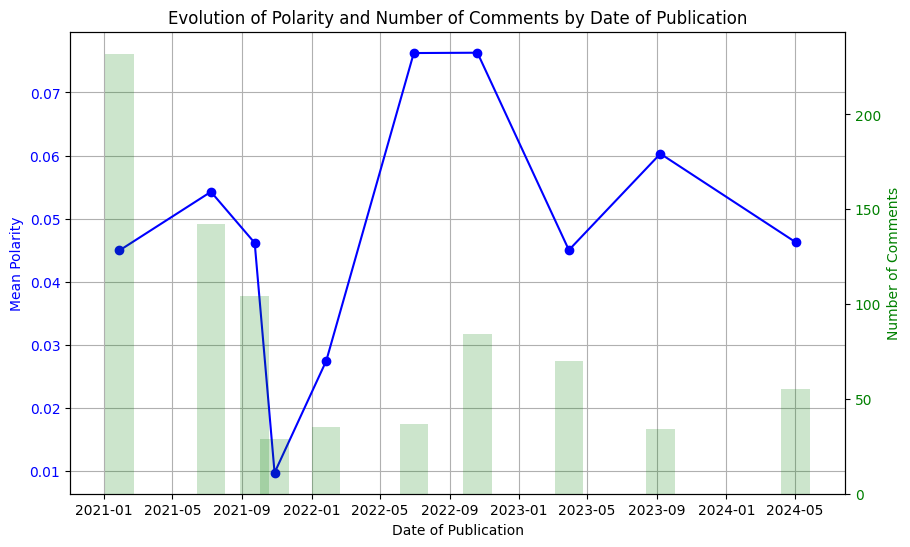

In [39]:
# Evolution de la polarité des commentaires d'un youtubeur

df_commentaires =  pd.DataFrame({})
for i in vilebrequin_videos:
    df = pd.read_csv(f'data/dataframes/{i}.csv')
    df['video_id'] = i
    
    
    infos = pd.read_json(f'data/infos/{i}_infos.json', typ='series')
    df['date_publication'] = infos['date_publication']
    
    df_commentaires = pd.concat([df_commentaires, df])
    
df_tmp = df_commentaires[df_commentaires['comment'].str.contains('vpn', case=False, na=False)]

# Convert 'date_publication' to datetime
df_tmp['date_publication'] = pd.to_datetime(df_tmp['date_publication'])

# Group by date and calculate mean polarity
polarity_by_date = df_tmp.groupby(df_tmp['date_publication'].dt.date)['polarity'].mean()

# Group by date and count number of comments
comments_by_date = df_tmp.groupby(df_tmp['date_publication'].dt.date).size()

# Plot the evolution of polarity
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(polarity_by_date.index, polarity_by_date.values, marker='o', color='b')
ax1.set_xlabel('Date of Publication')
ax1.set_ylabel('Mean Polarity', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Evolution of Polarity and Number of Comments by Date of Publication')
ax1.grid(True)

# Create a secondary y-axis to plot the number of comments
ax2 = ax1.twinx()
ax2.bar(comments_by_date.index, comments_by_date.values, alpha=0.2, color='g', width=50)
ax2.set_ylabel('Number of Comments', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.show()   
    

In [ ]:
# comparaison general de la polarité entre tout les youtubeurs

df_commentaires =  pd.DataFrame({})
for j in [squeezie_videos, vilebrequin_videos, amixem_videos, joueur_du_grenier_videos, cyrus_north_videos, djilsi_videos, mcfly_et_carlito_videos
, pierre_croce_videos, dr_nozman_videos, fabien_olicard_videos, mathieu_sommet_videos, cyprien_videos, math_videos, poisson_fecond_videos]:
    for i in j:
        df = pd.read_csv(f'data/dataframes/{i}.csv')
        df['video_id'] = i
        infos = pd.read_json(f'data/infos/{i}_infos.json', typ='series')
        df['date_publication'] = infos['date_publication']
        df['youtubeur'] = infos['canal']
        df_commentaires = pd.concat([df_commentaires, df])
    print(infos['canal'])
df_tmp = df_commentaires[df_commentaires['comment'].str.contains('vpn', case=False, na=False)]


SQUEEZIE
Vilebrequin
Amixem
Joueur Du Grenier
Cyrus North
Djilsi
Mcfly et Carlito
Pierre Croce
Dr Nozman
FabienOlicard
Mathieu Sommet
Cyprien
MATH
Conte Fécond


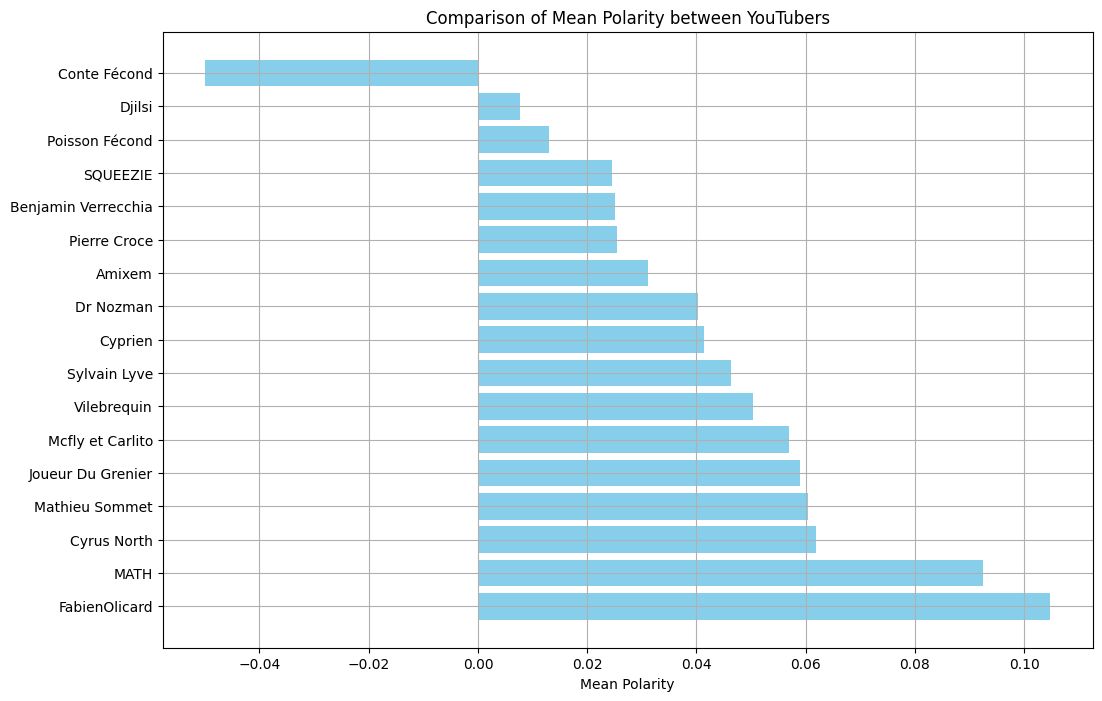

In [ ]:
# Group by date and calculate mean polarity
polarity_by_youtubeur = df_tmp.groupby(df_tmp['youtubeur'])['polarity'].mean()

# Group by date and count number of comments
comments_by_youtubeur = df_tmp.groupby(df_tmp['youtubeur']).size()

# Sort by polarity in descending order
polarity_by_youtubeur = polarity_by_youtubeur.sort_values(ascending=False)

# Plot the comparison of polarity between YouTubers
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(polarity_by_youtubeur.index, polarity_by_youtubeur.values, color='skyblue')
ax.set_xlabel('Mean Polarity')
ax.set_title('Comparison of Mean Polarity between YouTubers')
ax.grid(True)

plt.show()

In [ ]:
'''Quels mots reviennent le plus souvent dans les commentaires quand on parle de NordVPN ?'''
# 2 nuage de mots qui reviennent en rapport avec nordvpn en fonction de la polarité pos vs neg

df_polarity_pos = df_tmp[df_tmp['polarity'] > 0]
df_polarity_neg = df_tmp[df_tmp['polarity'] < 0]

word_cloud(df_polarity_pos, nlp)

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:116: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [47]:

word_cloud(df_polarity_neg, nlp)

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:115: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\hervo\Documents\Cours\M2 MAS\Text_Mining_Project\utils\def_utils.py:116: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [4]:
import plotly.express as px
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import WordCloud

def word_cloud(df,nlp):
    df = df[df['comment'].str.contains('vpn', case=False, na=False)]
    print(len(df))
    
    # Depuis comment recupéré les mots clés (mettre en minuscule, supprimer les stopwords et les mots de moins de 3 lettres, lemmatiser)
    keywords = []
    for comment in df['comment']:
        doc = nlp(comment)
        for token in doc:
            if token.is_alpha and len(token.text) > 2:
                keywords.append(token.lemma_.lower())

    print("step2")
    #retirer vpn et nord des mots clés
    keywords = [keyword for keyword in keywords if keyword not in ['vpn', 'nord','nordvpn','nvpn']]
    #retirer les stopwords
    keywords = [keyword for keyword in keywords if keyword not in nlp.Defaults.stop_words]
    print("step3")
    counter = Counter(keywords)
    
    wordcloud = WordCloud(width=3000, height=1000, 
                          background_color='white', 
                          stopwords=None, 
                          min_font_size=10).generate_from_frequencies(counter)
    print("step4")
    fig = px.imshow(wordcloud, title="Nuage de mots des Commentaires")
    fig.update_xaxes(visible=False) 
    fig.update_yaxes(visible=False)
    
    return fig

In [3]:
from utils.def_utils import all_comments,word_cloud

df = all_comments()
display(len(df))

# word_cloud(df, nlp, keyword_sheet_id='test', want_to_save=True)

420650

In [14]:
word_cloud(df, nlp, keyword_sheet_id='pola_neg')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [7]:
df = all_comments()

df = df[df['Comment'].str.contains('vpn', case=False, na=False)]

In [64]:
from collections import Counter
import pandas as pd
import spacy
from plotly import express as px

# Charger le modèle spaCy en français
nlp = spacy.load("fr_core_news_sm")

def bigramme(df):
    # Filtrer les commentaires contenant des mentions relatives à VPN
    keywords = ['vpn', 'nordvpn', 'nvpn', 'nord vpn']
    df = df[df['Comment'].str.contains('|'.join(keywords), case=False, na=False)]
    
    bigram = Counter()
    
    for comment in df['Comment']:
        # Traiter chaque commentaire avec spaCy
        doc = nlp(comment.lower())
        words = [
            token.lemma_ for token in doc
            if token.is_alpha and not token.is_stop  # Conserver seulement les mots significatifs
        ]
        
        # Construire les bigrammes
        for i in range(len(words) - 1):
            bigram[(words[i], words[i + 1])] += 1
    
    # Trier et sélectionner les 20 bigrammes les plus fréquents
    bigram = bigram.most_common(20)
    
    # Convertir en DataFrame pour une visualisation facile
    bigram_df = pd.DataFrame(bigram, columns=['bigram', 'count'])
    bigram_df['bigram'] = bigram_df['bigram'].apply(lambda x: ' '.join(x))  # Joindre les bigrammes en texte
    
    # Créer un graphique interactif avec Plotly
    fig = px.bar(
        bigram_df,
        x='bigram',
        y='count',
        title="Bigrammes des Commentaires contenant des mots liés à NordVPN",
        labels={'bigram': 'Bigramme', 'count': 'Nombre d\'occurrences'},
        text='count'
    )
    
    # Affiner l'apparence du graphique
    fig.update_layout(xaxis_tickangle=-45)
    
    return fig

def trigramme(df):
    # Filtrer les commentaires contenant des mentions relatives à VPN
    keywords = ['vpn', 'nordvpn', 'nvpn', 'nord vpn']
    df = df[df['Comment'].str.contains('|'.join(keywords), case=False, na=False)]
    
    trigram = Counter()
    
    for comment in df['Comment']:
        # Traiter chaque commentaire avec spaCy
        doc = nlp(comment.lower())
        words = [
            token.lemma_ for token in doc
            if token.is_alpha and not token.is_stop  # Conserver seulement les mots significatifs
        ]
        
        # Construire les trigrammes
        for i in range(len(words) - 2):  # Adapté pour trigrammes
            trigram[(words[i], words[i + 1], words[i + 2])] += 1
    
    # Trier et sélectionner les 20 trigrammes les plus fréquents
    trigram = trigram.most_common(20)
    
    # Convertir en DataFrame pour une visualisation facile
    trigram_df = pd.DataFrame(trigram, columns=['trigram', 'count'])
    trigram_df['trigram'] = trigram_df['trigram'].apply(lambda x: ' '.join(x))  # Joindre les trigrammes en texte
    
    # Créer un graphique interactif avec Plotly
    fig = px.bar(
        trigram_df,
        x='trigram',
        y='count',
        title="Trigrammes des Commentaires contenant des mots liés à NordVPN",
        labels={'trigram': 'Trigramme', 'count': 'Nombre d\'occurrences'},
        text='count'
    )
    
    # Affiner l'apparence du graphique
    fig.update_layout(xaxis_tickangle=-45)
    
    return fig

bigramme(df)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': "Bigramme=%{x}<br>Nombre d'occurrences=%{text}<extra></extra>",
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'text': array([2510.,  296.,  158.,  154.,  115.,  109.,  102.,   61.,   61.,   60.,
                               46.,   46.,   44.,   44.,   44.,   43.,   42.,   42.,   41.,   39.]),
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['nord vpn', 'pub nord', 'placement produit', 'pub nordvpn',
                          'sponso nord', 'sponso nordvpn', 'captain nord', 'meilleur pub',
                          'pub vpn', 'captain nordvpn', 'vidéo sponsoriser', 'servir rien',
                          'north vpn', 'satisfait rembourser', 'vidéo micode', 'regarder vidéo',
                          'abonnement an', 'sponsoriser nord', 'utiliser vpn', 'placement nord'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([2510,  296,  158,  154,  115,  109,  102,   61,   61,   60,   46,   46,
                            44,   44,   44,   43,   42,   42,   41,   39]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Bigrammes des Commentaires contenant des mots liés à NordVPN'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'tickangle': -45, 'title': {'text': 'Bigramme'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': "Nombre d'occurrences"}}}
})

In [33]:
len(df)

420782

In [34]:
len(df[df['Comment'].str.contains(r'vpn|nord|sponso', case=False, na=False)])

8334

In [30]:
comments_by_youtubeur = df.groupby(['youtubeur','video_id']).size().reset_index(name='count').groupby('youtubeur')['count'].mean()
comments_by_youtubeur

youtubeur
Amixem                  62.900000
Benjamin Verrecchia      4.000000
Conte Fécond             7.000000
Cyprien                 72.714286
Cyrus North             14.400000
Djilsi                   7.800000
Dr Nozman               68.900000
FabienOlicard            7.800000
Joueur Du Grenier      116.700000
Léo - TechMaker         26.000000
MATH                    15.300000
Mcfly et Carlito        40.500000
Pierre Croce            20.666667
Poisson Fécond          41.222222
SQUEEZIE                39.200000
Sylvain Lyve            55.000000
Vilebrequin             85.222222
Name: count, dtype: float64

In [33]:
total_comments_by_youtubeur = df.groupby(['youtubeur','video_id']).size()#.reset_index(name='count').groupby('youtubeur')['count'].sum()
total_comments_by_youtubeur


youtubeur    video_id   
Amixem       7a0DayJnGMc     21
             GFnzjrGh3Yc    269
             JbiBkKy4NFs     24
             V9dJEWTjxlM     28
             XhbECIm1Wa4     15
                           ... 
Vilebrequin  dKYvoi2EBPc    142
             hBV07QvRuoA     34
             qEuZ6u5ISgQ     37
             t775Ro5-_co     70
             w0CdJP4vMH0     35
Length: 119, dtype: int64

In [10]:
from utils.def_utils import comment_analysis
video_id = 'nAIxgbHbDYE'

commentaires, infos_video = obtenir_infos_video_et_commentaires(video_id, API_KEY)
print(infos_video)
commentaires = [c for c in commentaires if c]
df_commentaires = pd.DataFrame([{'Comment': c} for c in commentaires])
df_commentaires = df_commentaires.dropna(subset=['Comment'])
print('goo')
df_commentaires = comment_analysis(df_commentaires, video_id, video_id)

{'titre_video': 'LE DEEP WEB, SI DANGEREUX QUE ÇA ?', 'description_video': 'Pour ne JAMAIS arrêter d\'apprendre, il faut prendre mon extension gratuite juste ici : http://leotechmaker.com/addon\nSalut c\'est Léo de la chaine TechMaker et aujourd\'hui on va parler du DeepWeb !\nPour profiter de la promo sur NordVPN avec le code "leo" c\'est ici : https://NordVPN.org/leo\n🌟 Abonnez-vous à la chaîne, c\'est 100% gratuit : https://www.youtube.com/leotechmaker?sub_confirmation=1\n\nN\'oubliez pas de liker la vidéo, ça m\'aide ÉNORMÉMENT ! 👍\nEt n\'hésitez pas non plus à commenter, je répond très souvent :) 💬\nEnfin, pour ne rater aucune vidéo, activez la cloche ! 🔔\n\nMa dernière vidéo ➡️ https://goo.gl/Dsd5Rh\n\n🎥 Mon setup COMPLET (PC / Caméra / Autres) : http://textup.fr/248446PT\n\nMerci à NordVPN d\'avoir sponsorisé la vidéo !\n\nSuivez moi sur mes réseaux sociaux pour plus d\'exclusivités :\n\n🐦 Twitter: @LeoTechMaker\n📷 Instagram: @LeoTechMaker\n\nContact pro (seulement pro) : leotec

KeyError: 'comment'

In [5]:
df = all_comments()
df.head()

NameError: name 'all_comments' is not defined

In [41]:
def compare_youtubeurs2(df, youtubeur):
    # Dataframe avec par youtubeur et par video_id le nombre de commentaires total et le nombre de commentaires parlant de vpn
    comments_by_youtubeur = df.groupby(['youtubeur', 'video_id']).size().reset_index(name='count')
    df_tmp = df[df['Comment'].str.contains('vpn', case=False, na=False)]
    vpn_comments_by_youtubeur = df_tmp.groupby(['youtubeur', 'video_id']).size().reset_index(name='count')

    # merge des deux dataframes
    df_youtubeurs = pd.merge(comments_by_youtubeur, vpn_comments_by_youtubeur, on=['youtubeur', 'video_id'], suffixes=('_total', '_vpn'))
    df_youtubeurs['vpn_part'] = df_youtubeurs['count_vpn'] / df_youtubeurs['count_total']
    
    # Nombre moyen de commentaires vpn par youtubeur    
    nb_comments_by_youtubeur = df_youtubeurs.groupby('youtubeur')['count_vpn'].mean()
        
    # Part moyenne des commentaires parlant de vpn par youtubeur
    part_comments_by_youtubeur = df_youtubeurs.groupby('youtubeur')['vpn_part'].mean()
    
    fig = go.Figure()
    # Trace pour le nombre moyen de commentaires vpn
    colors_nb = ['red' if yt == youtubeur else 'skyblue' for yt in nb_comments_by_youtubeur.index]
    fig.add_trace(go.Bar(x=nb_comments_by_youtubeur.index, y=nb_comments_by_youtubeur.values,
                         name='Mean Number of VPN Comments', yaxis='y1', marker_color=colors_nb))
    
    # Trace pour la part moyenne des commentaires vpn
    colors_part = ['red' if yt == youtubeur else 'skyblue' for yt in part_comments_by_youtubeur.index]
    fig.add_trace(go.Bar(x=part_comments_by_youtubeur.index, y=part_comments_by_youtubeur.values,
                         name='Mean Part of VPN Comments', yaxis='y2', marker_color=colors_part))
    
    fig.update_layout(
        title='Comparison of Mean Number and Part of VPN Comments between YouTubers',
        xaxis_title='YouTubers',
        yaxis=dict(title='Mean Number of VPN Comments', side='left', showgrid=False),
        yaxis2=dict(title='Mean Part of VPN Comments', side='right', overlaying='y', showgrid=False),
        barmode='overlay'
    )
    return fig

def compare_youtubeurs3(df, youtubeur):
    # Dataframe avec par youtubeur et par video_id le nombre de commentaires total et le nombre de commentaires parlant de vpn
    comments_by_youtubeur = df.groupby(['youtubeur', 'video_id']).size().reset_index(name='count')
    df_tmp = df[df['Comment'].str.contains('vpn', case=False, na=False)]
    vpn_comments_by_youtubeur = df_tmp.groupby(['youtubeur', 'video_id']).size().reset_index(name='count')

    # merge des deux dataframes
    df_youtubeurs = pd.merge(comments_by_youtubeur, vpn_comments_by_youtubeur, on=['youtubeur', 'video_id'], suffixes=('_total', '_vpn'))
    df_youtubeurs['vpn_part'] = df_youtubeurs['count_vpn'] / df_youtubeurs['count_total']
    
    # Nombre moyen de commentaires vpn par youtubeur    
    nb_comments_by_youtubeur = df_youtubeurs.groupby('youtubeur')['count_vpn'].mean()
        
    # Part moyenne des commentaires parlant de vpn par youtubeur
    part_comments_by_youtubeur = df_youtubeurs.groupby('youtubeur')['vpn_part'].mean()
    
    fig = go.Figure()
    # Trace pour le nombre moyen de commentaires vpn
    colors_nb = ['red' if yt == youtubeur else 'skyblue' for yt in nb_comments_by_youtubeur.index]
    fig.add_trace(go.Bar(x=nb_comments_by_youtubeur.index, y=nb_comments_by_youtubeur.values,
                            name='Mean Number of VPN Comments', yaxis='y1', marker_color=colors_nb))
    
    # Trace pour la part moyenne des commentaires vpn
    fig.add_trace(go.Scatter(x=part_comments_by_youtubeur.index, y=part_comments_by_youtubeur.values,
                                mode='lines+markers', name='Mean Part of VPN Comments', yaxis='y2', line=dict(color='orange')))
    
    fig.update_layout(
        title='Comparison of Mean Number and Part of VPN Comments between YouTubers',
        xaxis_title='YouTubers',
        yaxis=dict(title='Mean Number of VPN Comments', side='left', showgrid=False),
        yaxis2=dict(title='Mean Part of VPN Comments', side='right', overlaying='y', showgrid=False),
        barmode='overlay'
    )
    return fig

In [1]:
import os
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# French stop words (you can customize this list further)
french_stopwords = set(ENGLISH_STOP_WORDS).union({
    'le', 'la', 'les', 'un', 'une', 'des', 'et', 'ou', 'au', 'aux', 'avec', 'ce', 'ces',
    'dans', 'de', 'du', 'elle', 'en', 'est', 'et', 'eux', 'il', 'je', 'lui', 'ma', 'mais',
    'me', 'moi', 'mon', 'ne', 'ni', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas',
    'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes',
    'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'ça', 'plus', 'tout', "c'est",
    'y', 'a', 'c', 'd', 'l', 'm', 'n', 's', 't', 'quand', 'quel', 'quelle', 'quelles', 
    'quels', 'sans', 'sous', 'donc', 'bien', 'alors', 'va', 'aux', 'chez', 'dont', 
    'depuis', 'peut', 'très', 'va', 'ça', "c'est", "j'ai", 'à', 'Nord', 'nord', 'VPN','nordvpn','nord', 'vpn', 'https', 'youtube', 'video', 'sponso', 'squeezie',
    'cette', 'cette vidéo', 'vidéo', 'j ai', 'tous', 'ici', 'j', 'ai', 'êtes', 'djilsi', 'cyrus north',"s'y rendre", "n'est",
    'suis', 'sait', 'dit', 'fait', 'ils', 'être', 'si', '!','?', ':', '4', '2', "c' est", 'est', 'c', "'", 'vidéos', 'car','même',"«","»", 'leur'
})

# Function to compute weighted word frequencies for the word cloud
def compute_weighted_word_frequencies(df, top_n=50):
    word_frequencies = {}
    weighted_comments = []

    for _, row in df.iterrows():
        weighted_comments.append((row['Comment'], len(str(row['Comment']))))
    
    # Sort by weight and take the top N
    top_weighted_comments = sorted(weighted_comments, key=lambda x: x[1], reverse=True)[:top_n]

    # Split comments into words and calculate frequencies
    for comment, weight in top_weighted_comments:
        words = comment.split()
        for word in words:
            # Exclude words containing 'http' and French stop words
            if word.lower() not in french_stopwords and "http" not in word.lower() and "est" not in word.lower() :
                word_frequencies[word.lower()] = word_frequencies.get(word.lower(), 0) + weight

    return word_frequencies

# Generate word clouds for each YouTuber
def generate_wordclouds(df, top_n=50):
    word_frequencies = compute_weighted_word_frequencies(df, top_n=top_n)
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=french_stopwords, max_words=50).generate_from_frequencies(word_frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for (Top {top_n} Weighted Comments)")
    plt.show()

# # Generate word clouds for all comments without any filtering
# generate_wordclouds(df, top_n=50)

In [9]:
df_tmp = df[df['Comment'].str.contains(r'vpn|nord', case=False, na=False)]
df_tmp_pos = df_tmp[df_tmp['Number'] > 3]
df_tmp_neg = df_tmp[df_tmp['Number'] < 3]

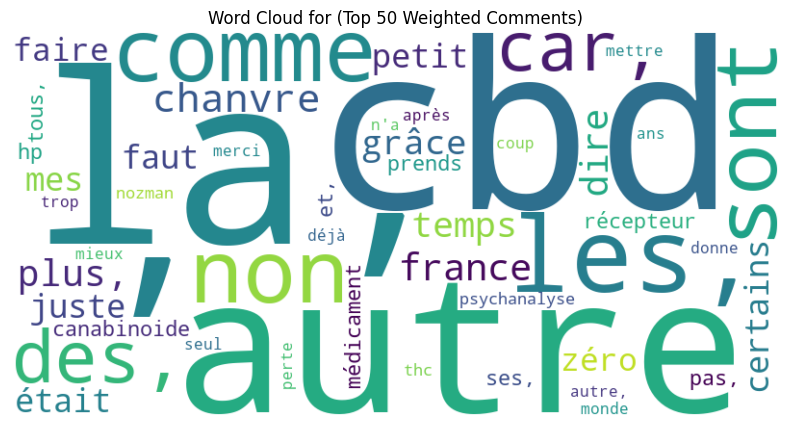

In [50]:
generate_wordclouds(df_tmp_neg, top_n=50)

C:\Users\hervo\AppData\Local\Temp\ipykernel_81376\790533932.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



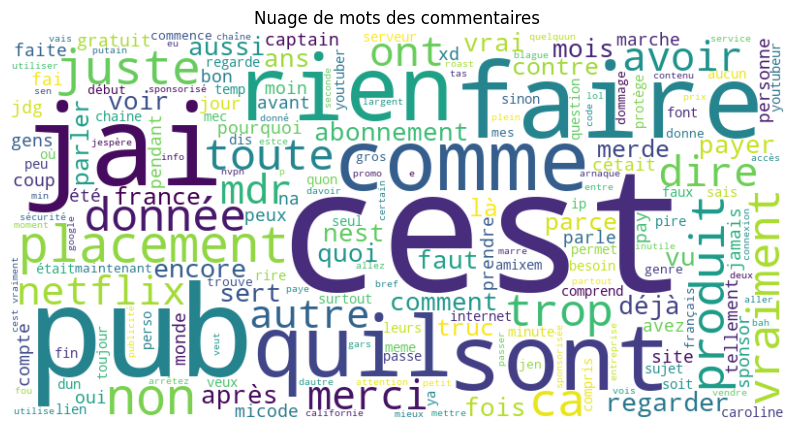

In [54]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Étape 2 : Nettoyer les commentaires
def nettoyer_commentaires(commentaire):
    commentaire = str(commentaire).lower()  # Mettre en minuscule
    commentaire = re.sub(r'http\S+|www\S+|https\S+', '', commentaire, flags=re.MULTILINE)  # Supprimer les liens
    commentaire = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', commentaire)  # Supprimer la ponctuation et caractères spéciaux
    commentaire = re.sub(r'\s+', ' ', commentaire).strip()  # Supprimer les espaces multiples
    return commentaire

df_tmp_neg['commentaire_nettoye'] = df_tmp_neg['Comment'].apply(nettoyer_commentaires)

# Étape 3 : Concaténer tous les commentaires nettoyés
texte_total = ' '.join(df_tmp_neg['commentaire_nettoye'])

# Étape 4 : Générer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    stopwords=french_stopwords,
    colormap='viridis'  # Palette de couleurs
).generate(texte_total)

# Étape 5 : Afficher le nuage de
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Pas d'axes
plt.title("Nuage de mots des commentaires")
plt.show()

In [14]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import re

# Charger le modèle français de spaCy
nlp = spacy.load('fr_core_news_sm')

def nuage_de_mots_filtres(df, colonne_commentaire):
    """
    Prend un DataFrame et une colonne contenant des commentaires,
    extrait les noms communs et adjectifs en supprimant les mots non pertinents,
    puis affiche un nuage de mots.

    Paramètres :
    - df : pandas.DataFrame contenant les commentaires.
    - colonne_commentaire : str, nom de la colonne avec les commentaires.

    Retour :
    - Affiche un nuage de mots sous forme de graphique.
    """
    # Vérifier si la colonne existe
    if colonne_commentaire not in df.columns:
        raise ValueError(f"La colonne '{colonne_commentaire}' n'existe pas dans le DataFrame.")

    # Liste personnalisée de stopwords supplémentaires
    stopwords_perso = {'cest', 'tout', 'tous', 'cette', 'ton', 'ta', 'tes', 'un', 'une', 'des', 
                       'les', 'le', 'la', 'de', 'du', 'au', 'aux', 'etc', 'ce', 'ça', 'et', 'en', 'avec', 'nord', 'vpn', 'nordvpn', 'nvpn'}

    # Fonction pour nettoyer et extraire les noms et adjectifs
    def extraire_noms_adjectifs(texte):
        # Nettoyage de base
        texte = str(texte).lower()
        texte = re.sub(r'http\S+|www\S+|https\S+', '', texte)  # Supprimer les liens
        texte = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', texte)  # Supprimer la ponctuation
        texte = re.sub(r'\s+', ' ', texte).strip()

        # Tokenisation et extraction des mots
        doc = nlp(texte)
        mots_filtres = [token.text for token in doc 
                        if token.pos_ in ['NOUN', 'ADJ']  # Noms et adjectifs
                        and token.text not in stopwords_perso  # Stopwords personnalisés
                        and token.text not in nlp.Defaults.stop_words]  # Stopwords de spaCy
        return ' '.join(mots_filtres)

    # Appliquer la fonction à la colonne des commentaires
    df['mots_filtres'] = df[colonne_commentaire].apply(extraire_noms_adjectifs)

    # Concaténer tous les mots extraits
    texte_total = ' '.join(df['mots_filtres'])

    # Créer le nuage de mots
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        stopwords=stopwords_perso,
        colormap='viridis'
    ).generate(texte_total)

    # Afficher le nuage de mots
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Nuage de mots (noms et adjectifs filtrés)")
    plt.show()


C:\Users\hervo\AppData\Local\Temp\ipykernel_71836\1880716533.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mots_filtres'] = df[colonne_commentaire].apply(extraire_noms_adjectifs)


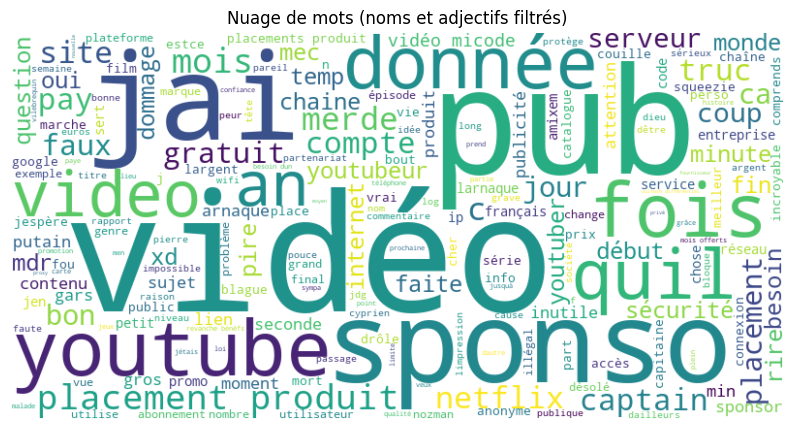

In [15]:
nuage_de_mots_filtres(df_tmp_neg, 'Comment')

In [17]:
# export df_tmp_neg to csv
df_tmp_neg['Comment'].to_csv('data/df_tmp_neg.csv', index=False)

In [30]:
import matplotlib.pyplot as plt
from collections import Counter

# Nettoyage de base pour récupérer les mots fréquents
def nettoyer_et_compter(commentaires):
    mots = []
    stopwords_fr = {'nordvpn', 'vpn', 'cest', 'vous', 'avec', 'mais', 'qui', 'les', 'des',
                    'dans', 'pour', 'que','nord', 'pas', 'une', 'sur', 'est', 'vidéo', 'plus', 
                    'jai', 'pub', 'par','fait','quand', 'faire', 'tout','ils', 'sont', 'même', 'rien', 'cette',
                    'suis','comme', 'moi','donc', 'avoir','video','ont',
 'nous','ton','tes','mdr','dire',
 'peut',
 'quoi',
 'car',
 'tous',
 'faut',
 'dit',
 'fois',
 'quil',
 'youtube',
 'vraiment',
 'juste',
 'non',
 'alors',
 'trop'}
    for commentaire in commentaires:
        commentaire = str(commentaire).lower()
        commentaire = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', commentaire)  # Supprimer ponctuation
        tokens = commentaire.split()
        mots.extend([mot for mot in tokens if len(mot) > 2 and mot not in stopwords_fr])
    return Counter(mots)

# Réduire le DataFrame pour éviter la surcharge mémoire
df_reduit = df_tmp_neg  # Sous-échantillon de 500 commentaires

# Compter les mots fréquents
frequence_mots = nettoyer_et_compter(df_reduit['Comment'])

# Préparer les données pour le graphique
mots_cles, frequences = zip(*frequence_mots.most_common(10))

mots_cles

('sponso',
 'bien',
 'données',
 'placement',
 'produit',
 'netflix',
 'mois',
 'merci',
 'regarder',
 'jamais')

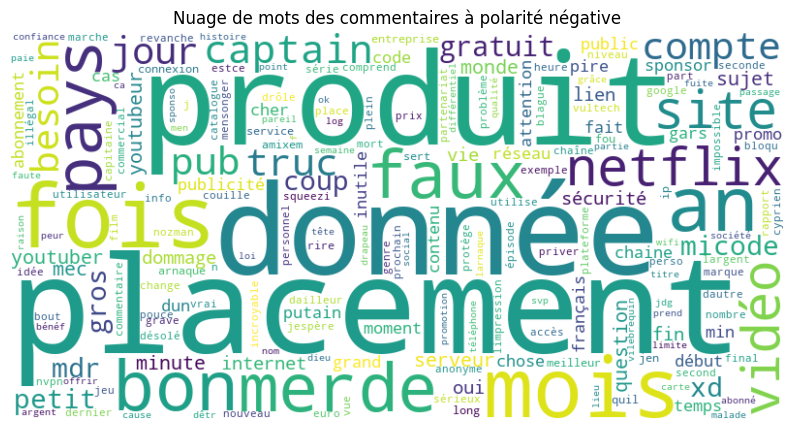

In [47]:
french_stopwords = {'nordvpn', 'vpn','jai', 'cest','nord','c','quil','pub','vidéo','youtube','youtub','sponso','video'
                    }

def pos_tagging_noms_adjectifs(commentaires):
    mots_filtres = []
    for commentaire in commentaires:
        commentaire = str(commentaire).lower()
        commentaire = re.sub(r'[^a-zA-ZÀ-ÿ\s]', '', commentaire)  # Nettoyage basique
        doc = nlp(commentaire)  # Analyse du texte avec spaCy
        # Extraire uniquement les mots avec les POS "NOUN" et "ADJ", retirer les stopwords et lemmatiser
        mots_filtres.extend([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ'] 
                             and token.text not in french_stopwords 
                             and token.text not in nlp.Defaults.stop_words])
    return Counter(mots_filtres)

# Appliquer POS tagging sur un échantillon réduit pour éviter la mémoire
mots_pos_filtres = pos_tagging_noms_adjectifs(df_tmp_neg['Comment'])

# Générer le nuage de mots
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    stopwords=french_stopwords,
    colormap='viridis'
).generate_from_frequencies(mots_pos_filtres)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des commentaires à polarité négative")
plt.show()

In [12]:
from utils.def_utils import all_comments
import pandas as pd

df = all_comments()

comments_by_youtubeur = df.groupby(['youtubeur', 'video_id']).size().reset_index(name='count')
polarity_by_youtubeur = df.groupby(['youtubeur', 'video_id'])['Number'].mean().reset_index(name='polarity')

df_tmp = df[df['Comment'].str.contains(r'vpn|nord', case=False, na=False)]
vpn_comments_by_youtubeur = df_tmp.groupby(['youtubeur', 'video_id']).size().reset_index(name='count')
vpn_polarity_by_youtubeur = df_tmp.groupby(['youtubeur', 'video_id'])['Number'].mean().reset_index(name='polarity')

# Merge des 4 dataframes
df_youtubeurs = pd.merge(comments_by_youtubeur, polarity_by_youtubeur, on=['youtubeur', 'video_id'])
df_youtubeurs = pd.merge(df_youtubeurs, vpn_comments_by_youtubeur, on=['youtubeur', 'video_id'])
df_youtubeurs = pd.merge(df_youtubeurs, vpn_polarity_by_youtubeur, on=['youtubeur', 'video_id'], suffixes=('_total', '_vpn'))

# Renommer les colonnes pour plus de clarté
df_youtubeurs.rename(columns={
    'count_x': 'total_comments',
    'Number_total': 'mean_polarity_total',
    'count_y': 'vpn_comments',
    'Number_vpn': 'mean_polarity_vpn'
}, inplace=True)


In [17]:
df_youtubeurs.sort_values('polarity_vpn', ascending=True)

youtubeur     video_id  total_comments  polarity_total  vpn_comments  \
52   FabienOlicard  nvUW0rNRO4o             564        2.902482            11   
24     Cyrus North  aHxxlIRQnU0             469        2.722814             3   
92  Poisson Fécond  BdNG7Cigivc             444        3.022523            27   
87    Pierre Croce  XysTdbVUwZc             393        3.000000             5   
88    Pierre Croce  c3SHBznbrxc             583        3.324185             4   
..             ...          ...             ...             ...           ...   
28     Cyrus North  xQThTwAgdYM             228        3.368421             1   
31          Djilsi  bJI2ATANRSQ             757        3.924703             3   
51   FabienOlicard  nJESmkkFRF4             109        3.642202             1   
53   FabienOlicard  rXdQYh0QZKo             110        3.309091             1   
73            MATH  uow5jejB7aE            2221        4.126970             4   

    polarity_vpn  
52      1.636364  
24      1.666667  
92      1.962963  
87      2.000000  
88      2.000000  
..           ...  
28      5.000000  
31      5.000000  
51      5.000000  
53      5.000000  
73      5.000000  

[119 rows x 6 columns]

In [28]:
filtered_comments = df[(df['video_id'] == 'BdNG7Cigivc') & (df['Comment'].str.contains(r'vpn|nord', case=False, na=False))]['Comment']

for comment in filtered_comments:
    print(comment)
    print()


Petite précision, un VPN ça sert à avoir un contrôle de son pc à distance via des serveur, et non à changer le pays dans le quel vous êtes, juste l'usage a été détourné. Donc les VPN sont à bannir, surtout que ce n'est pas fiable et que pleins d'infos circules dans la nature à cause de cet usage malheureusement...

À force on a compris nous allons prendre des abonnements vpn ça suffit 😂

chris STP ton nord VPN me fait rire ! mais tu sais pas meme un VPN peut te tracker mon amis, de plus youtube bloque les VPN la promotion les publicitées les adbock, et autre, (tu fait pas le poid face a ce logitiel mon amis (adGuard security) !!! ça cest un logitiel ! d'antis tracker de filtrages publicitaires autopromotions et autres antis addware ou rosomware TROJAN hammconage (PVN, DNS, POXI, NETWORK,) (ça bloque 100 des filtres, cookies, tracabilité, trackers, qui fonctionnes a 100 % tu peut meme delocaliser ton adresse IP physique ! meme ton historique est impossible a suivre ..... on apelle celas